In [1]:
import pandas as pd

df = pd.read_csv("Iris.csv")
df = df.drop(["Id"], axis=1)
target = df["Species"]

s = set()
for val in target:
    s.add(val)

s = list(s)
rows = list(range(100, 150))
df = df.drop(df.index[rows])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


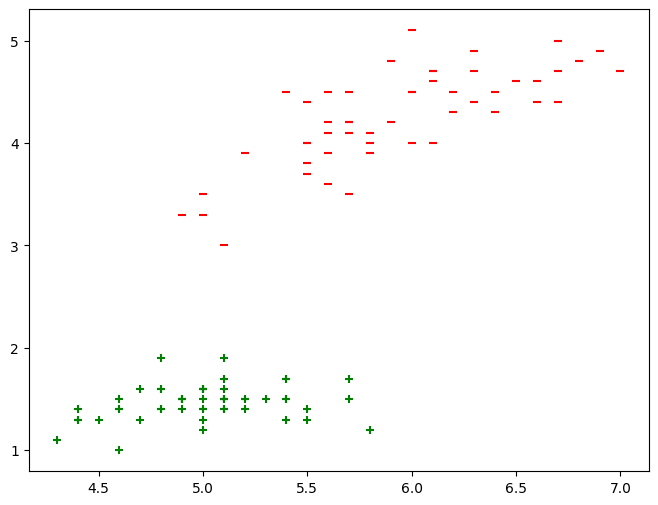

In [2]:
import matplotlib.pyplot as plt

x = df["SepalLengthCm"]
y = df["PetalLengthCm"]

setosa_x = x[:50]
setosa_y = y[:50]

versicolor_x = x[50:]
versicolor_y = y[50:]

plt.figure(figsize=(8, 6))
plt.scatter(setosa_x, setosa_y, marker="+", color="green")
plt.scatter(versicolor_x, versicolor_y, marker="_", color="red")
plt.show()

In [3]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import numpy as np

# Drop rest of the features and extract the target values
df = df.drop(["SepalWidthCm", "PetalWidthCm"], axis=1)
Y = []
target = df["Species"]
for val in target:
    if val == "Iris-setosa":
        Y.append(-1)
    else:
        Y.append(1)
df = df.drop(["Species"], axis=1)
X = df.values.tolist()

# Shuffle and split the data into training and test set
X, Y = shuffle(X, Y)
x_train = []
y_train = []
x_test = []
y_test = []

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.9)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

y_train = y_train.reshape(90, 1)
y_test = y_test.reshape(10, 1)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(90, 2) (90, 1) (10, 2) (10, 1)


In [9]:
# Support Vector Machine
import numpy as np

train_f1 = x_train[:, 0]
train_f2 = x_train[:, 1]

train_f1 = train_f1.reshape(90, 1)
train_f2 = train_f2.reshape(90, 1)

w1 = np.zeros((90, 1))
w2 = np.zeros((90, 1))

epochs = 1
alpha = 0.0001

while epochs < 10000:
    y = w1 * train_f1 + w2 * train_f2
    prod = y * y_train
    print(epochs, end="\r")
    count = 0
    for val in prod:
        if val >= 1:
            cost = 0
            w1 = w1 - alpha * (2 * 1 / epochs * w1)
            w2 = w2 - alpha * (2 * 1 / epochs * w2)
        else:
            cost = 1 - val
            w1 = w1 + alpha * (train_f1[count] * y_train[count] - 2 * 1 / epochs * w1)
            w2 = w2 + alpha * (train_f2[count] * y_train[count] - 2 * 1 / epochs * w2)
        count += 1
    epochs += 1

In [10]:
from sklearn.metrics import accuracy_score

# Clip the weights
index = list(range(10, 90))
w1 = np.delete(w1, index)
w2 = np.delete(w2, index)

w1 = w1.reshape(10, 1)
w2 = w2.reshape(10, 1)
# Extract the test data features
test_f1 = x_test[:, 0]
test_f2 = x_test[:, 1]

test_f1 = test_f1.reshape(10, 1)
test_f2 = test_f2.reshape(10, 1)

# Predict
y_pred = w1 * test_f1 + w2 * test_f2
predictions = []
for val in y_pred:
    if val > 1:
        predictions.append(1)
    else:
        predictions.append(-1)

accuracy_score(y_test, predictions)

0.9